# K-Mode (t-SNE)

<br> 

Throughout this notebook, the original datasets shall be reduced in dimensions via the utilization of t-distirbuted stochastic neighbor embedding and a K-Mode model will further be implemented on both the new Zero and Nonzero Datasets.

According to the original dataset, the best performing distance is the Minkowski distance. As a result only this will be applied to this dataset. Furthermore, considering that FasterPAM proved to be a better algorithm than K-Medoid, only this shall be utilised in future modelling.

## <u> Table of Contents </u>
* [Import the DataSet](#1)
* [t-SNE](#22.1)
* [Modelling Zero Data](#22.3)
    * [Elbow & Silhoutte: t-SNE Zero](#23.3)
        * [Zero: K-Mode](#M13)
        * [Zero Visualisation](#N00)
* [Modelling Nonzero Data](#MU)
    * [Elbow & Silhoutte: t-SNE Nonzero](#NN)
        * [Nonzero: K-Mode](#M18)
        * [Nonzero Visualisation](#N0)

<br>

## Import the DataSet  <a class="anchor" id="1"></a>

In [1]:
#!pip install plotly
#!pip install joypy
#!pip install pyvis
#!pip install prince
#!pip install pyclustering
#!pip install clusteval
#!pip install kmodes
#!pip install gower
#!pip install scikit-learn-extra
#!pip install minisom
#!pip install fuzzy-c-means

In [2]:
# Remove the warnings

import warnings; warnings.simplefilter('ignore')

# Basic Packages

import pandas as pd
import numpy as np
from numpy import asarray
from numpy import save

# Set a random state 

np.random.seed(9)

# Notebook Setup

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"
pd.set_option('display.max_columns', None)

# Plotting Packages

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from matplotlib.widgets import SpanSelector
from bokeh.models import Div, RangeSlider, Spinner
from bokeh.plotting import figure, show
import plotly.express as px
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from joypy import joyplot
from pyvis.network import Network
from IPython.display import Image
import plotly.offline as pyo
from yellowbrick.cluster import KElbowVisualizer

# Set notebook mode to work in offline

pyo.init_notebook_mode()

# Packages for Transformations

import scipy.special
import prince
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances


# Packages for Clustering

from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
from clusteval import clusteval
from kmodes.kmodes import KModes
from kmedoids import fasterpam
from sklearn.cluster import AgglomerativeClustering 
import gower
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import DBSCAN
from minisom import MiniSom
from sklearn.cluster import Birch
import scipy.cluster.hierarchy as shc
from fcmeans import FCM

# Packages to measure performance

from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from scipy.spatial import distance as ssd
from pyclustering.cluster.kmedoids import kmedoids

In [3]:
# Import the zero dataset and remove unwanted columns

final_zero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\final_zero.csv')
final_zero.drop(columns=['Unnamed: 0'], inplace=True)
tra_zero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\tra_zero.csv')
tra_zero.drop(columns=['Unnamed: 0'], inplace=True)
zero_df = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\zero_df.csv')
zero_df.drop(columns=['Unnamed: 0'], inplace=True)

# Import the nonzero dataset and remove unwanted columns

final_nonzero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\final_nonzero.csv')
final_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
tra_nonzero = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\tra_nonzero.csv')
tra_nonzero.drop(columns=['Unnamed: 0'], inplace=True)
nonzero_df = pd.read_csv(r'C:\Users\cgirardi\OneDrive - zeb\Desktop\BB\nonzero_df.csv')
nonzero_df.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# check if the finalzero dataset is correct

final_zero.head(1)

volume_firm  liabilities_firm  bank_liabilities  other_liabilities  \
0    -0.919737         -1.221589          -1.39815          -0.213653   

         pl  banking_products  new_active_cc  new_passive_cc  \
0 -0.611916         -0.341303      -0.432425        -0.13513   

   new_commission_income  legal  p_membership  p_KK  p_fixeddeposits  \
0              -0.181772   16.0           1.0   1.0              1.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_unionfunds  \
0                  0.0                 0.0   0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank   work  year  risk  \
0                0.0         0.0          0.0         0.0  208.0  13.0   1.0   

   postcode  
0      32.0

In [5]:
# check if the transformed zero dataset is correct

tra_zero.head(1)

client_type  legal  branch  volume_firm  liabilities_firm  liabilities  \
0          0.0   16.0    10.0    10.103612          9.181565          0.0   

   bank_liabilities  other_liabilities    pl_firm         pl  \
0               0.0         -11.512925  12.735183  14.697371   

   banking_products  other_products  p_membership  p_KK  p_creditcard  \
0               0.0             0.0           1.0   1.0           0.0   

   p_bankloans  p_fixeddeposits  p_WP2Depot  p_propertyinsurance  \
0          1.0              1.0         0.0                  0.0   

   p_companyinsurance  p_DZ  p_DZP  p_unionfunds  p_buildingsavings  \
0                 0.0   0.0    0.0           0.0                0.0   

   p_mortgage  p_VRleasing  p_teambank  new_active_cc  new_passive_cc  \
0         0.0          0.0         0.0           -0.0        0.050022   

   new_commission_income  new_cmib   work  year  risk  postcode  size  
0              26.431755  3.856511  208.0  13.0   1.0      32.0   1.0

In [6]:
# check if the original zero dataset is correct

zero_df.head(1)

client_type  legal  branch  volume_firm  volume  loans_approved  \
0          0.0   16.0    10.0     31792.82     0.0             0.0   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0             0.0           6103.29          0.0               0.0   

   other_liabilities   pl_firm         pl  banking_products  other_products  \
0                0.0  47870.67  11518.478               0.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           1.0   1.0           0.0          1.0              1.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0            0.0   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            0.05                  47.25      47.3  208.0  13.0   1.0   

   postcode  size  
0      32.0   1.0

In [7]:
# check if the final nonzero dataset is correct

final_nonzero.head(1)

loans_approved  bank_liabilities  other_liabilities        pl  \
0       -0.428154          -0.57338          -0.426741 -1.530136   

   banking_products  new_active_cc  new_commission_income  client_type  legal  \
0         -0.458714       0.300147              -0.464326          0.0   39.0   

   p_membership  p_KK  p_creditcard  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_mortgage  p_VRleasing  \
0                  0.0                 0.0   0.0         0.0          0.0   

   p_teambank   work  year  risk  postcode  
0         0.0  393.0  11.0   0.0      46.0

In [8]:
# check if the transformed nonzero dataset is correct

tra_nonzero.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     8.333568  7.697297         9.93363   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0       10.883836          7.523551    10.231201           9.80453   

   other_liabilities   pl_firm        pl  banking_products  other_products  \
0               -0.0  7.444261  9.518547               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0       5.180153   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0          2.5096              13.890309  5.466413  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

In [9]:
# check if the original nonzero dataset is correct

nonzero_df.head(1)

client_type  legal  branch  volume_firm    volume  loans_approved  \
0          0.0   39.0    23.0     12988.79  12988.79        12988.79   

   loans_utilized  liabilities_firm  liabilities  bank_liabilities  \
0        12988.79            748.17       748.17            748.17   

   other_liabilities  pl_firm       pl  banking_products  other_products  \
0                0.0  7388.77  7388.77               2.0             0.0   

   p_membership  p_KK  p_creditcard  p_bankloans  p_fixeddeposits  p_WP2Depot  \
0           0.0   1.0           0.0          1.0              0.0         0.0   

   p_propertyinsurance  p_companyinsurance  p_DZ  p_DZP  p_unionfunds  \
0                  0.0                 0.0   0.0    0.0           0.0   

   p_buildingsavings  p_mortgage  p_VRleasing  p_teambank  new_active_cc  \
0                0.0         0.0          0.0         0.0         177.71   

   new_passive_cc  new_commission_income  new_cmib   work  year  risk  \
0            12.3                   46.6    236.61  393.0  11.0   0.0   

   postcode  size  
0      46.0   1.0

# t-SNE  <a class="anchor" id="22.1"></a>


We now adopt t-SNE to assess whether this can yield better results than the original dataset. <br>

In [10]:
# define the t-SNE algorithm

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=3000, learning_rate=300)

# Zero Dataset
# we apply t-SNE to the zero dataset

T_zero = tsne.fit_transform(final_zero)

# Nonzero Dataset
# we apply t-SNE to the zero dataset

T_nonzero = tsne.fit_transform(final_nonzero)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 5186 samples in 0.002s...
[t-SNE] Computed neighbors for 5186 samples in 4.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5186
[t-SNE] Computed conditional probabilities for sample 2000 / 5186
[t-SNE] Computed conditional probabilities for sample 3000 / 5186
[t-SNE] Computed conditional probabilities for sample 4000 / 5186
[t-SNE] Computed conditional probabilities for sample 5000 / 5186
[t-SNE] Computed conditional probabilities for sample 5186 / 5186
[t-SNE] Mean sigma: 1.675326
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.978943
[t-SNE] KL divergence after 3000 iterations: 0.414801
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 13807 samples in 0.000s...
[t-SNE] Computed neighbors for 13807 samples in 1.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13807
[t-SNE] Computed conditional probabilities for sample 2000 / 13807
[t-SNE] Computed condit

<br>

# Modelling the t-SNE DataSet  <a class="anchor" id="23.2"></a>

Once all models have been applied to the Original dataset, we can now focus on the datasets that have been dimensionally reduced. <br><br>
To ensure consistency and standardization we follow the same approach, namely: <br>
- identify the optimal number of clusters
- apply the clustering models.
<br>

## Modelling Zero Data  <a class="anchor" id="22.3"></a>

Foremost we develop a similarity matrix with Minkowski distance.

In [11]:
# develop a dissimilarity matrix using minkowski for fasterpam 

mat = pairwise_distances(T_zero, metric='minkowski')

<br>

### Elbow & Sillhoutte: t-SNE  Zero <a class="anchor" id="23.3"></a>

We then hypertune the parameters of the FasterPAM algorithm

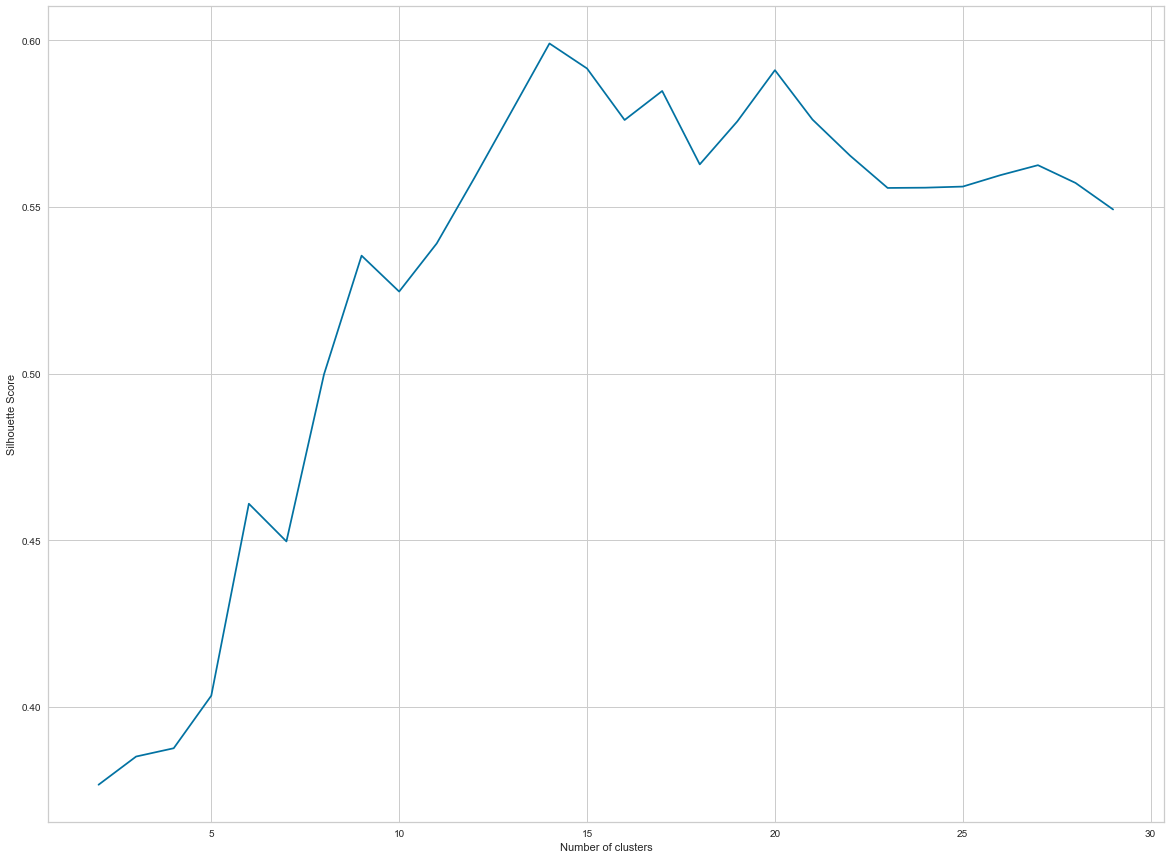

In [12]:
plt.figure(figsize=(20,15))

results = {}
for i in range(2,30):
    m = fasterpam(mat , medoids = i, max_iter = 5000, init ='random', random_state=9)
    labels = m.labels
    sil_index = silhouette_score(mat, labels)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

#### K-Modes <a class="anchor" id="M13"></a>

In [13]:
# we set the function for K-Modes

fast_zero_T = fasterpam(mat, medoids = 14, max_iter = 5000, init ='random', random_state = 9)

# Assign the labels to the respective rows and further view the cluster segmentation 

final_zero['Cluster_fast_T'] = fast_zero_T.labels

tra_zero['Cluster_fast_T'] = fast_zero_T.labels

zero_df["Cluster_fast_T"] = fast_zero_T.labels

print('Distribution of Clusters: \n')
print(zero_df['Cluster_fast_T'].value_counts())

Distribution of Clusters: 

1     691
10    552
0     530
6     428
3     426
4     416
7     357
9     347
12    333
8     314
5     254
11    218
2     162
13    158
Name: Cluster_fast_T, dtype: int64


In [14]:
print('The t-SNE performance scores are the following: \n' )
print('Silhouette: ' + str(silhouette_score(T_zero, fast_zero_T.labels , metric='euclidean')))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(T_zero, fast_zero_T.labels)))
print('Davies Bouldin: ' + str(davies_bouldin_score(T_zero, fast_zero_T.labels)))

The t-SNE performance scores are the following: 

Silhouette: 0.5992739
Calinski Harabasz: 11461.179159635669
Davies Bouldin: 0.5368506563127895


###  Zero Visualisation <a class="anchor" id="N00"></a>

In [15]:
# Define t-SNE with two components

tsne_2d = TSNE(n_components=2)

In [16]:
# we remove the clusters from a new dataset

tt = tra_zero.drop(columns=['Cluster_fast_T'])

# we create a new df with 2 components

T_2d = pd.DataFrame(tsne_2d.fit_transform(tt))

# T1_2d: The first component
# T2_2d: The second component

T_2d.columns = ["T1_2d", "T2_2d"]

# we create a new df

tra_zero1=tra_zero.copy()

# we concatonate all dfs together to then derive visuals

tra_zero1 = pd.concat([tra_zero1, T_2d], axis=1, join='inner')

In [17]:
# we create a new variable for each cluster in the dataset so we create two empty lists

cluster = []
idd = []

# we then create a loop to iterate through the values

for i in tra_zero1["Cluster_fast_T"].value_counts().index:
    n = i
    id_ = 'cluster_' + str(n) # for each id we create a new variable
    m = str(id_) +  ' = ' + 'tra_zero1[tra_zero1["Cluster_fast_T"] == ' + str(n) + ']' # we then define the variable 
    idd.append(id_) # we append its id to the list
    cluster.append(m) # we append the variable to the list

# we then create a loop to execute all of the new variables created
    
for i in cluster:
    exec(i)

    
# we create two new lists, one to contain the different PCA plots, the other to store the trace (i.e. id of the plot)
    
nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter(x =' + i + '["T1_2d"], y =' + i + '["T2_2d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)
    
# we create a dictionary to ensure that all traces are correctly defined  
    
commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a

# we execute the dictionary and create the individual plots  
    
for key, value in commands.items():
    exec (f'{key}={value}')            
   

In [18]:
# we retrieve all the new features

for i in l:
    print(i)

tracecluster_1
tracecluster_10
tracecluster_0
tracecluster_6
tracecluster_3
tracecluster_4
tracecluster_7
tracecluster_9
tracecluster_12
tracecluster_8
tracecluster_5
tracecluster_11
tracecluster_2
tracecluster_13


In [19]:
# we set a title for the graph

title = "Visualizing Clusters in Two Dimensions Using t-SNE"

# we set an appropriate layout 

layout = dict(title = title,
              xaxis= dict(title= 'T1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'T2',ticklen= 5,zeroline= False)
             )

# we zip all the traces to create one figure

fig = dict(data = [tracecluster_1,
tracecluster_10,
tracecluster_0,
tracecluster_6,
tracecluster_3,
tracecluster_4,
tracecluster_7,
tracecluster_9,
tracecluster_12,
tracecluster_8,
tracecluster_5,
tracecluster_11,
tracecluster_2,
tracecluster_13], layout = layout)

pyo.iplot(fig)
    

##  Modelling Nonzero Data<a class="anchor" id="MU"></a>

We now focus on the nonzero dataset. Foremost we develop the matrix of similarity with a Minkowski distance.

In [20]:
# develop a dissimilarity matrix using minkowski for fasterpam 

mat_n = pairwise_distances(T_nonzero, metric='minkowski')

###  Elbow and Silhouette: Non-Zero t-SNE <a class="anchor" id="NN"></a>

We then hypertune the nonzero dataset with a similiar approach to the zero dataset.

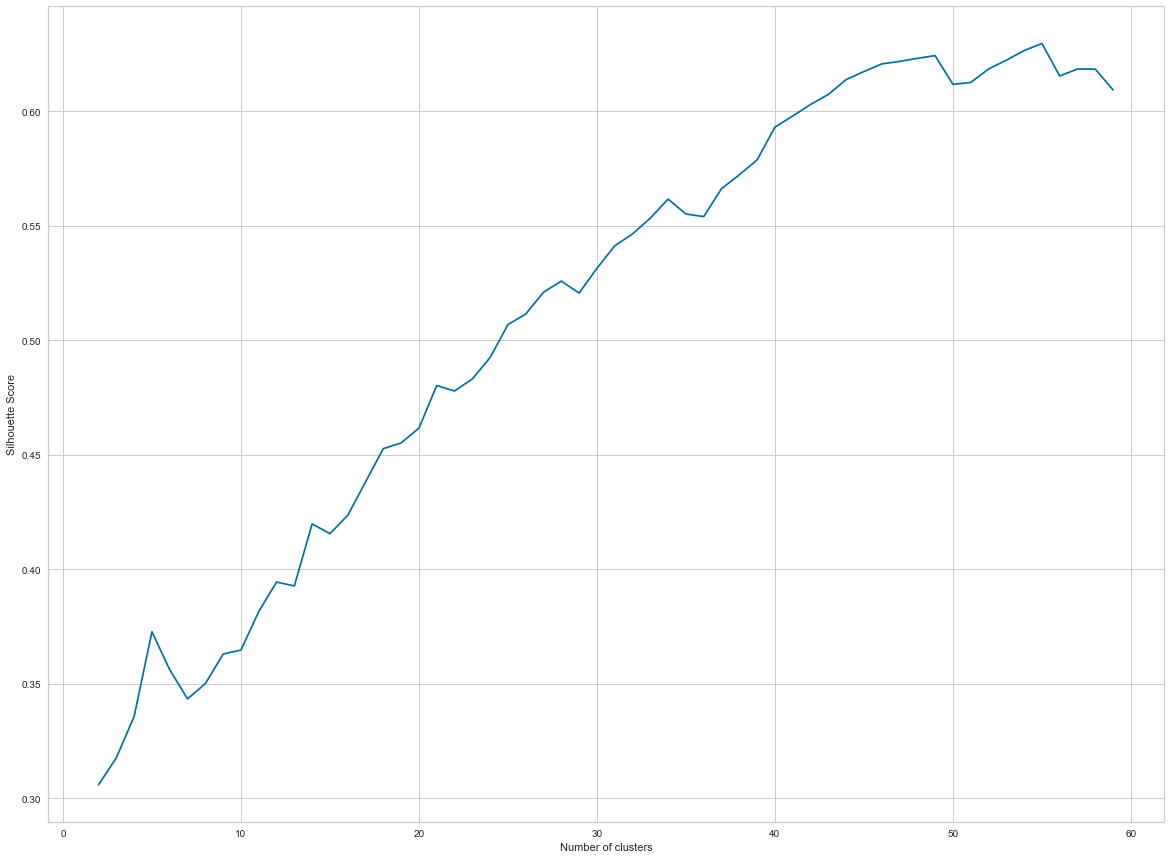

In [21]:
plt.figure(figsize=(20,15))

results = {}
for i in range(2,60):
    m = fasterpam(mat_n , medoids = i, max_iter = 5000, init ='random', random_state=9)
    labels = m.labels
    sil_index = silhouette_score(mat_n, labels)
    results.update({i: sil_index})
    
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.show()

#### K-Modes <a class="anchor" id="M18"></a>

In [22]:
# we set the function for K-Modes

fast_nonzero_T = fasterpam(mat_n, medoids = 54, max_iter = 5000, init ='random', random_state = 9)


# Assign the labels to the respective rows and further view the cluster segmentation 

final_nonzero['Cluster_fast_T'] = fast_nonzero_T.labels

tra_nonzero['Cluster_fast_T'] = fast_nonzero_T.labels

nonzero_df["Cluster_fast_T"] = fast_nonzero_T.labels

print('Distribution of Clusters: \n')
print(nonzero_df['Cluster_fast_T'].value_counts())

Distribution of Clusters: 

41    543
33    523
20    470
7     466
19    436
1     414
50    399
13    382
2     381
21    364
37    358
4     308
0     306
38    302
18    300
44    300
52    283
48    281
10    277
34    264
39    262
23    258
43    257
14    244
17    231
27    231
51    230
36    230
9     229
5     225
45    223
53    222
35    218
32    211
49    205
11    197
46    192
47    189
25    187
28    185
6     183
29    176
30    171
3     157
15    152
40    151
16    149
12    145
8     140
24    133
22    130
42    124
31    114
26     99
Name: Cluster_fast_T, dtype: int64


In [23]:
print('The t-SNE performance scores are the following: \n' )
print('Silhouette: ' + str(silhouette_score(T_nonzero, fast_nonzero_T.labels , metric='euclidean')))
print('Calinski Harabasz: ' + str(calinski_harabasz_score(T_nonzero, fast_nonzero_T.labels )))
print('Davies Bouldin: ' + str(davies_bouldin_score(T_nonzero, fast_nonzero_T.labels)))

The t-SNE performance scores are the following: 

Silhouette: 0.6386036
Calinski Harabasz: 41240.69756227716
Davies Bouldin: 0.508864939427317


###   Non-Zero Visualisation <a class="anchor" id="N0"></a>

In [24]:
# we remove the clusters from a new dataset

tt = tra_nonzero.drop(columns=['Cluster_fast_T'])

# we create a new df for 2 components

T_2d = pd.DataFrame(tsne_2d.fit_transform(tt))


# T1_2d: The first component
# T2_2d: The second component

T_2d.columns = ["T1_2d", "T2_2d"]

# we create a new df

tra_nonzero1=tra_nonzero.copy()

# we concatonate all dfs together to then derive visuals

tra_nonzero1 = pd.concat([tra_nonzero1, T_2d], axis=1, join='inner')

In [25]:
# we create a new variable for each cluster in the dataset so we create two empty lists

cluster = []
idd = []

# we then create a loop to iterate through the values

for i in tra_nonzero1["Cluster_fast_T"].value_counts().index:
    n = i
    id_ = 'cluster_' + str(n) # for each id we create a new variable
    m = str(id_) +  ' = ' + 'tra_nonzero1[tra_nonzero1["Cluster_fast_T"] == ' + str(n) + ']' # we then define the variable 
    idd.append(id_) # we append its id to the list
    cluster.append(m) # we append the variable to the list

# we then create a loop to execute all of the new variables created
    
for i in cluster:
    exec(i)

    
# we create two new lists, one to contain the different PCA plots, the other to store the trace (i.e. id of the plot)
    
nn = []
l = []    
for i in idd:
    b = 'trace' + i 
    p = 'go.Scatter(x =' + i + '["T1_2d"], y =' + i + '["T2_2d"], mode = "markers", text = None)'
    l.append(b)
    nn.append(p)
    
# we create a dictionary to ensure that all traces are correctly defined  
    
commands = {}
for a,b in zip(nn,l):
    key=str(b)
    commands[key]=a

# we execute the dictionary and create the individual plots  
    
for key, value in commands.items():
    exec (f'{key}={value}')            
   

In [26]:
# we retrieve all the new features

for i in l:
    print(i)

tracecluster_41
tracecluster_33
tracecluster_20
tracecluster_7
tracecluster_19
tracecluster_1
tracecluster_50
tracecluster_13
tracecluster_2
tracecluster_21
tracecluster_37
tracecluster_4
tracecluster_0
tracecluster_38
tracecluster_18
tracecluster_44
tracecluster_52
tracecluster_48
tracecluster_10
tracecluster_34
tracecluster_39
tracecluster_23
tracecluster_43
tracecluster_14
tracecluster_17
tracecluster_27
tracecluster_51
tracecluster_36
tracecluster_9
tracecluster_5
tracecluster_45
tracecluster_53
tracecluster_35
tracecluster_32
tracecluster_49
tracecluster_11
tracecluster_46
tracecluster_47
tracecluster_25
tracecluster_28
tracecluster_6
tracecluster_29
tracecluster_30
tracecluster_3
tracecluster_15
tracecluster_40
tracecluster_16
tracecluster_12
tracecluster_8
tracecluster_24
tracecluster_22
tracecluster_42
tracecluster_31
tracecluster_26


In [27]:
# we set a title for the graph

title = "Visualizing Clusters in Two Dimensions Using t-SNE"

# we set an appropriate layout 

layout = dict(title = title,
              xaxis= dict(title= 'T1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'T2',ticklen= 5,zeroline= False)
             )

# we zip all the traces to create one figure

fig = dict(data = [tracecluster_41,
tracecluster_33,
tracecluster_20,
tracecluster_7,
tracecluster_19,
tracecluster_1,
tracecluster_50,
tracecluster_13,
tracecluster_2,
tracecluster_21,
tracecluster_37,
tracecluster_4,
tracecluster_0,
tracecluster_38,
tracecluster_18,
tracecluster_44,
tracecluster_52,
tracecluster_48,
tracecluster_10,
tracecluster_34,
tracecluster_39,
tracecluster_23,
tracecluster_43,
tracecluster_14,
tracecluster_17,
tracecluster_27,
tracecluster_51,
tracecluster_36,
tracecluster_9,
tracecluster_5,
tracecluster_45,
tracecluster_53,
tracecluster_35,
tracecluster_32,
tracecluster_49,
tracecluster_11,
tracecluster_46,
tracecluster_47,
tracecluster_25,
tracecluster_28,
tracecluster_6,
tracecluster_29,
tracecluster_30,
tracecluster_3,
tracecluster_15,
tracecluster_40,
tracecluster_16,
tracecluster_12,
tracecluster_8,
tracecluster_24,
tracecluster_22,
tracecluster_42,
tracecluster_31,
tracecluster_26], layout = layout)

pyo.iplot(fig)
    